# 20-Ansys Workbench and Finite Element Analysis (FEA)

The following is a brief introduction to Ansys Workbench and Finite Element Analysis (FEA). FEA can be a very powerful tool in analyzing heat transfer and momentum transfer problems. For fluids, another name for it is Computational Fluid Dynamics (CFD). The following is a brief introduction to Ansys Workbench and Finite Element Analysis (FEA). 

In [1]:
#import needed packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

## 1D Heat Equation (Heat Conduction Down a Rod)

<img src="https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/1DHeatEqImg.png?raw=true" width="600">

<img src="https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/1DHeatEqImg2.png?raw=true" width="600">

In [2]:
# consistent parameters
alpha = 0.01  # Thermal diffusivity, k/Cp/rho

### Steady-state Scenario

For each of the finite elements:

$$
0 = \alpha\frac{d^2T}{dx^2}
$$

Equations for each element can be set and then solved using Scipy's fsolve.

In [3]:
totallength = 1
sections = np.arange(0,11,1)
dx = totallength/sections[-1]

In [4]:
#initial temps/boundary conditions
Temps = np.ones(len(sections))*400
Temps[0] = 500; Temps[-1] = 300
Tinitial = Temps.copy()

In [5]:
#equations to solve
def func(T):
    dTdt = [T[0]-Temps[0]]
    for each in range(1,len(sections)-1):
        dTdt.append(alpha/dx**2*(T[each+1] - 2*T[each] + T[each-1]))
    #dTdt.append(alpha/dx**2*(T[-2] - 2*T[-1] + T[-2])) #adiabatic end 
    dTdt.append(T[-1]-Temps[-1]) #constant temperature end
    return dTdt

In [6]:
sol = fsolve(func,Temps)

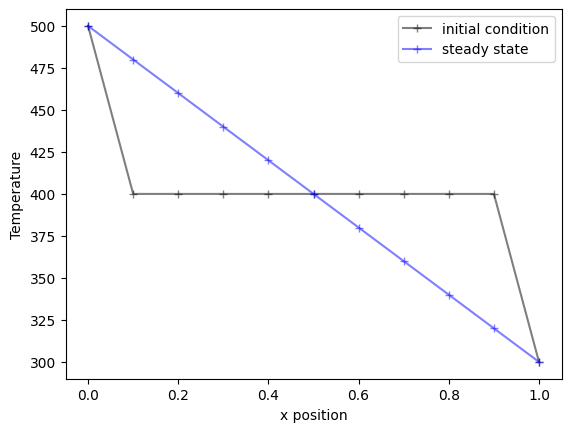

In [7]:
xpos = np.arange(0,len(Temps)*dx,dx)
plt.plot(xpos,Tinitial,'k-+',alpha=0.5,label='initial condition')
plt.plot(xpos,sol,'b-+',alpha=0.5,label='steady state')
plt.xlabel('x position'); plt.ylabel('Temperature');plt.legend()
plt.show()

### Transient Scenario

For each of the finite elements:

$$
\frac{dT}{dt} = \alpha\frac{d^2T}{dx^2}
$$

Equations for each element can be set and then solved using Euler's method or with odeint. Both methods are shown below.

#### Eulers Method

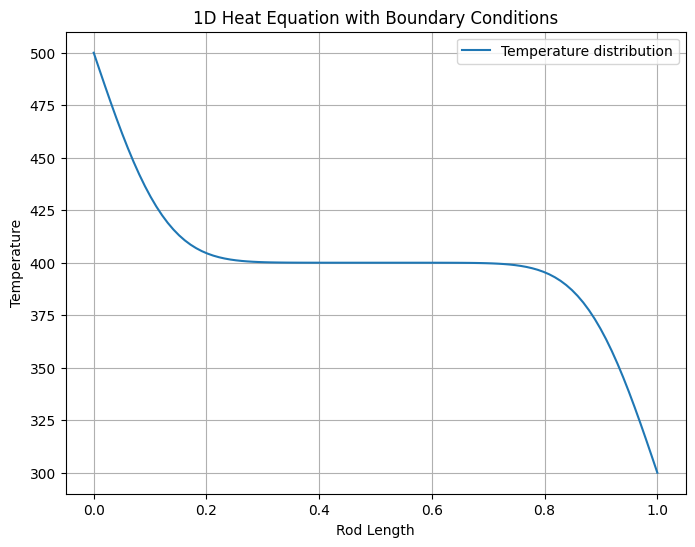

In [8]:
# Parameters

L = 1.0  # Length of the rod
T = 0.5  # Total time
Nx = 100  # Number of spatial points
Nt = 100  # Number of time steps
dx = L / (Nx - 1)  # Spatial step size
dt = T / Nt  # Time step size

# Initial condition
def initial_condition(x):
    return 400*np.ones(len(x)) #np.sin(np.pi * x)

# Set up the grid
x_values = np.linspace(0, L, Nx)
u = initial_condition(x_values)  # Set initial temperature distribution

# Applying boundary conditions
u[0] = 500  # Set left end of the bar to 500°C
u[-1] = 300  # Set right end of the bar to 300°C

# Explicit finite difference method
for n in range(Nt):
    u_new = u.copy()
    for i in range(1, Nx - 1):
        d2Tdx2 = 1 / (dx**2) * (u[i + 1] - 2 * u[i] + u[i - 1])
        u_new[i] = u[i] + alpha * dt * d2Tdx2
    u = u_new

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, u, label='Temperature distribution')
plt.title('1D Heat Equation with Boundary Conditions')
plt.xlabel('Rod Length')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


#### Odeint (More stable)

In [9]:
totallength = 1
sections = np.arange(0,100,1)
dx = totallength/sections[-1]

In [10]:
#initial temps
Temps = np.ones(len(sections))*400
Temps[0] = 500; Temps[-1] = 300
#time array
times = np.linspace(0,5,100)

In [11]:
def dTdt(T,time): #T is an array
    dTdt = [0]
    for each in range(1,len(sections)-1):
        dTdt.append(alpha/dx**2*(T[each+1] - 2*T[each] + T[each-1]))
    #dTdt.append(alpha/dx**2*(T[-2] - 2*T[-1] + T[-2])) #adiabatic end 
    dTdt.append(0) #constant temperature end
    return dTdt

In [12]:
sol = odeint(dTdt,Temps,times)

In [13]:
xpos = np.arange(0,len(Temps)*dx,dx)

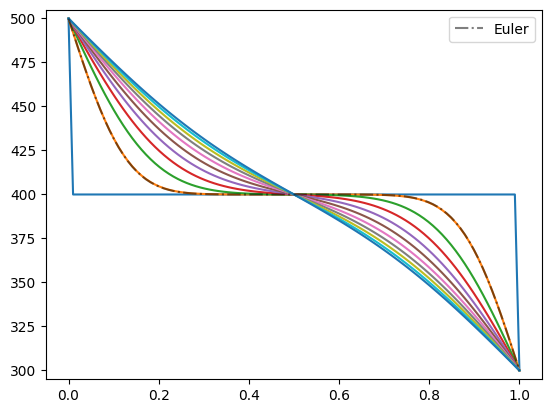

In [14]:
for i in range(len(times)):
    if i%10 == 0:
        plt.plot(xpos,sol[i])
        pass
plt.plot(xpos,sol[-1])
plt.plot(x_values,u,'k-.',alpha=0.5,label='Euler')
plt.ylim([295,505]);plt.legend()
plt.show()

## Ansys Workbench
The above programmatic solutions are great for simple problems, but for more complex problems, it is better to use a program like Ansys Workbench. Ansys Workbench is a program that allows you to build a model and then solve it using FEA. The following video is shows a brief introduction to Ansys Workbench.

[![Ansys Workbench Transient Simulation](https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/263%20Shorts%20(Ansys).png?raw=true)](https://youtu.be/KANEX_6yAwM)